<a href="https://colab.research.google.com/github/widyadaridhyp/Predicting-Student-Performance/blob/main/Predicting_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

StudentID: A unique identifier assigned to each student (1001 to 3392).

> Demographic Details
- Age: The age of the students ranges from 15 to 18 years.
- Gender: Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity: The ethnicity of the students, coded as follows:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other
- ParentalEducation: The education level of the parents, coded as follows:
  - 0: None
  - 1: High School
  - 2: Some College
  - 3: Bachelor's
  - 4: Higher

> Study Habits
- StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
- Absences: Number of absences during the school year, ranging from 0 to 30.
- Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

> Parental Involvement
- ParentalSupport: The level of parental support, coded as follows:
  - 0: None
  - 1: Low
  - 2: Moderate
  - 3: High
  - 4: Very High

> Extracurricular Activities
- Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

> Academic Performance
- GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

> Target Variable: Grade Class
- GradeClass: Classification of students' grades based on GPA:
  - 0: 'A' (GPA >= 3.5)
  - 1: 'B' (3.0 <= GPA < 3.5)
  - 2: 'C' (2.5 <= GPA < 3.0)
  - 3: 'D' (2.0 <= GPA < 2.5)
  - 4: 'F' (GPA < 2.0)

In [ ]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset")
print("Dataset downloaded to:", path)

Using Colab cache for faster access to the 'students-performance-dataset' dataset.
Dataset downloaded to: /kaggle/input/students-performance-dataset


In [ ]:
print(os.listdir(path))

['Student_performance_data _.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "Student_performance_data _.csv"))

In [ ]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.duplicated().sum()

np.int64(0)

Interpretasi:
- Tidak ada missing values
- Tidak ada data yang duplikasi
- Tidak perlu diencoding lagi
- Kemungkinan perlu dilakukan feature scaling

# Handling Multicolinearity

In [ ]:
feature = df.drop(columns = ['gradeclass','studentid'])
target = df['gradeclass']

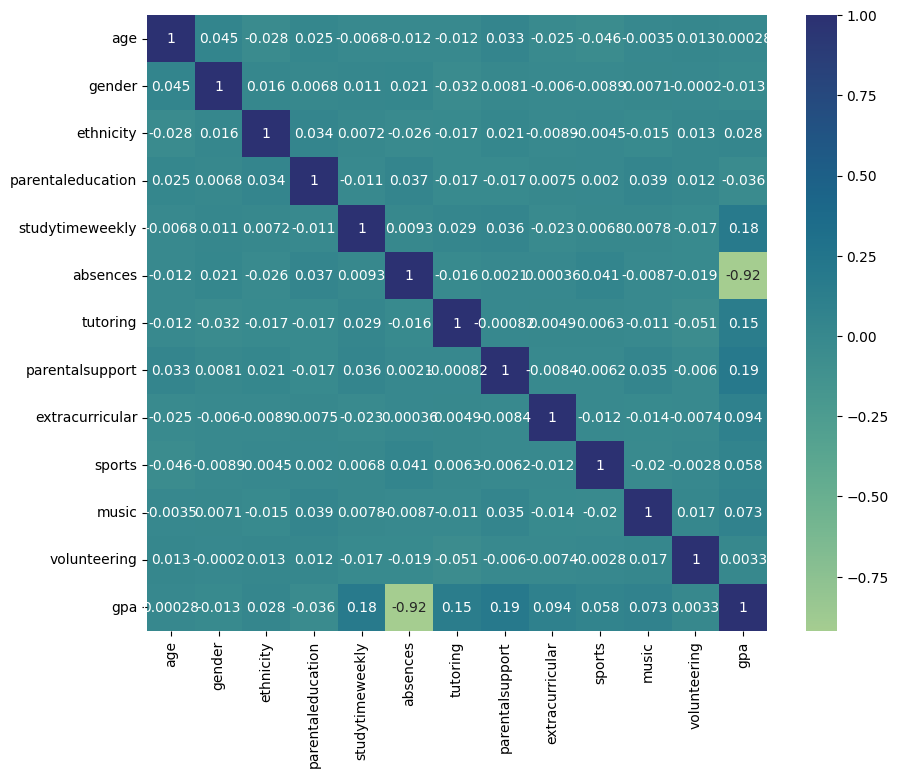

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(feature.corr(), annot=True, cmap='crest')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [ ]:
X = add_constant(feature)
pd.Series([vif(X.values, i) for i in range(X.shape[1])], index=X.columns)

,0
const,407.541262
age,1.009058
gender,1.005535
ethnicity,1.004690
parentaleducation,1.005949
studytimeweekly,1.697649
absences,19.563384
tutoring,1.348111
parentalsupport,1.756320
extracurricular,1.225417


$\therefore$ Since GPA greatly affects absence and the target variable (gradeclass), in this case of multicollinearity we will eliminate the GPA variable.

In [ ]:
feature.drop(columns='gpa', inplace=True)

In [ ]:
X = add_constant(feature)
pd.Series([vif(X.values, i) for i in range(X.shape[1])], index=X.columns)

,0
const,232.096195
age,1.008050
gender,1.004085
ethnicity,1.004501
parentaleducation,1.005870
studytimeweekly,1.003410
absences,1.005220
tutoring,1.005462
parentalsupport,1.004679
extracurricular,1.001835


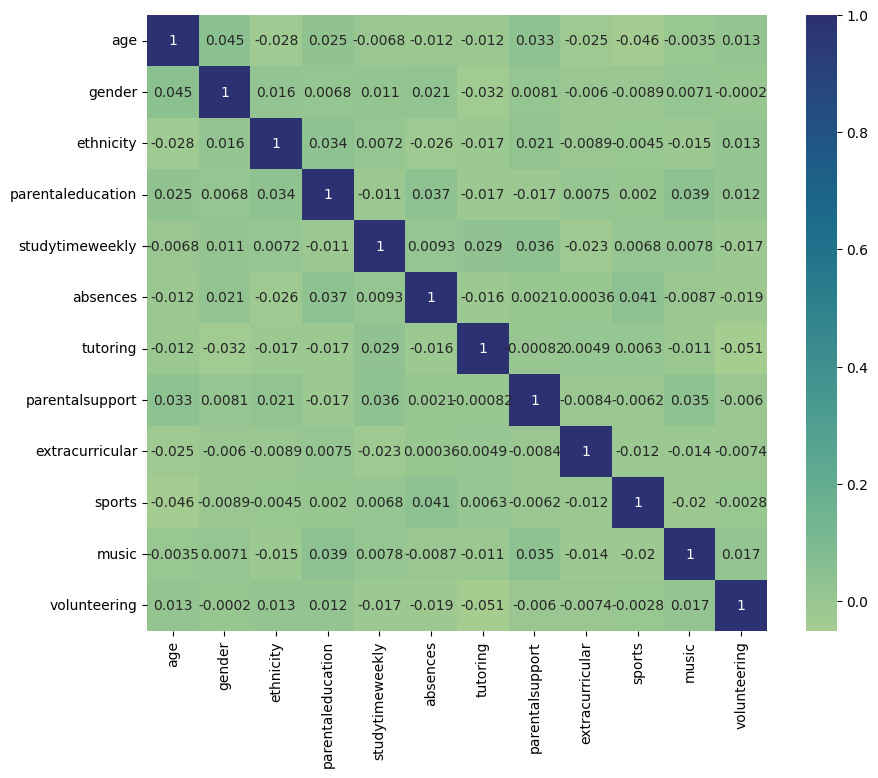

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(feature.corr(), annot=True, cmap='crest')
plt.show()

# Exploratory Data Analysis

In [ ]:
df_cleaned = df.drop(columns = ['studentid','gpa'])

In [ ]:
df_cleaned.columns

Index(['age', 'gender', 'ethnicity', 'parentaleducation', 'studytimeweekly',
       'absences', 'tutoring', 'parentalsupport', 'extracurricular', 'sports',
       'music', 'volunteering', 'gradeclass'],
      dtype='object')

/tmp/ipython-input-2217550454.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(feature.age, palette='crest')


<Axes: ylabel='age'>

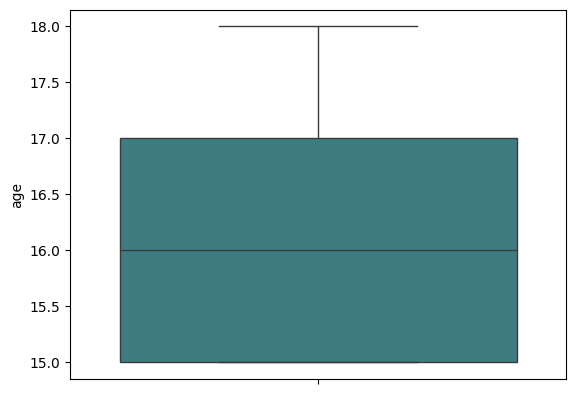

In [ ]:
sns.boxplot(feature.age, palette='crest')

/tmp/ipython-input-1924285462.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_cleaned.gradeclass, palette='crest')


<Axes: xlabel='gradeclass', ylabel='Count'>

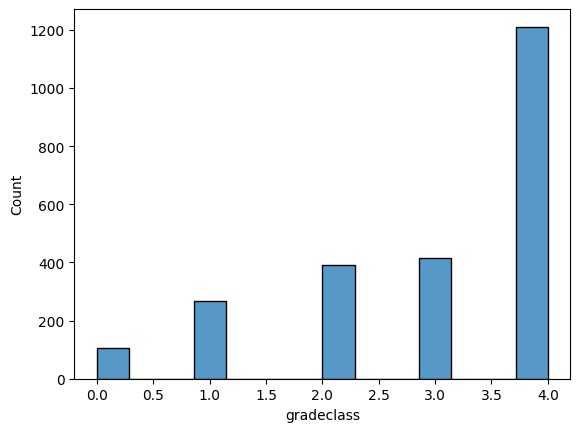

In [ ]:
sns.histplot(df_cleaned.gradeclass, palette='crest')

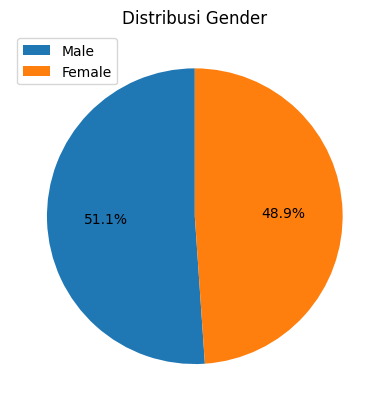

In [ ]:
plt.pie(
    feature.gender.value_counts(),
    autopct='%1.1f%%',  # format persentase, 1 digit desimal
    startangle=90        # biar mulai dari atas
)
plt.legend(['Male', 'Female'], loc='upper left')
plt.title("Distribusi Gender")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency, kruskal

In [ ]:
for col in feature:
  print(f'{col} : {feature[col].unique()}')

age : [17 18 15 16]
gender : [1 0]
ethnicity : [0 2 1 3]
parentaleducation : [2 1 3 4 0]
studytimeweekly : [19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]
absences : [ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]
tutoring : [1 0]
parentalsupport : [2 1 3 4 0]
extracurricular : [0 1]
sports : [0 1]
music : [1 0]
volunteering : [0 1]


$\therefore$ `ethnicity`, `parentaleducation`, dan `parentalsupport` are latent variables. Therefore, factor analysis will be used to reduce the data based on factors

In [ ]:
X_cat = ['gender','ethnicity','parentaleducation',
         'tutoring','parentalsupport','extracurricular',
         'sports','music','volunteering']

In [ ]:
custom_labels = {
    'ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'age': [15, 16, 17, 18],
    'parentaleducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'tutoring': ['No', 'Yes'],
    'parentalsupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'extracurricular': ['No', 'Yes'],
    'sports': ['No', 'Yes'],
    'music': ['No', 'Yes'],
    'volunteering': ['No', 'Yes'],
    'gender': ['Male', 'Female']
}

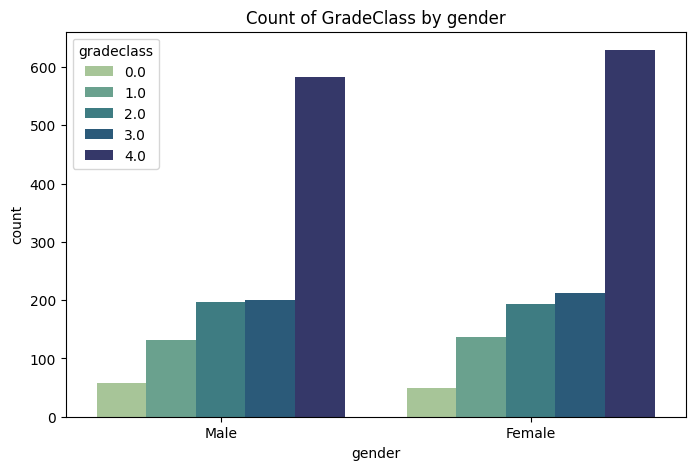

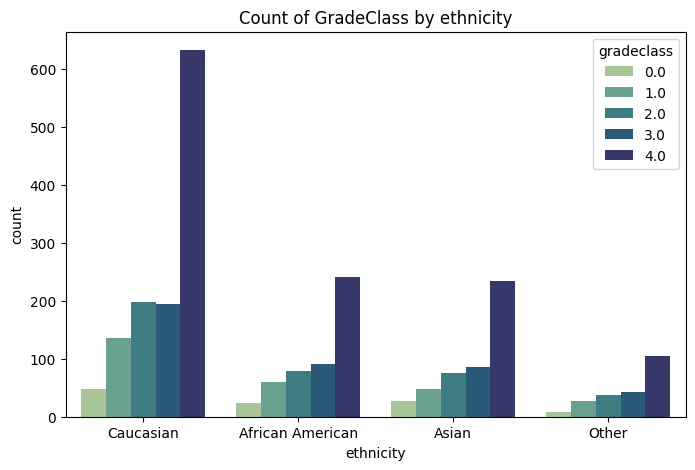

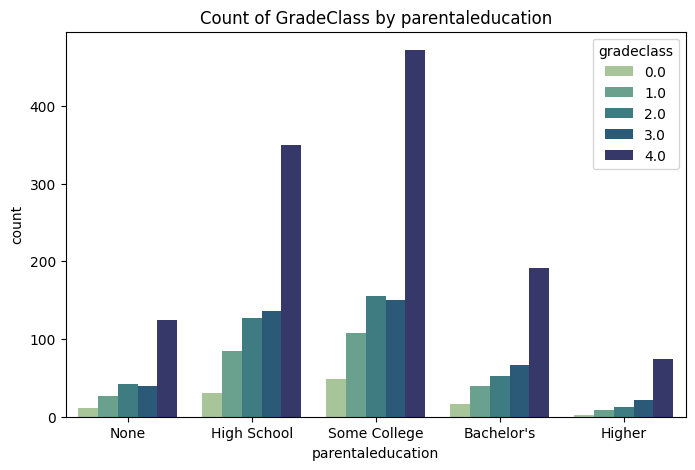

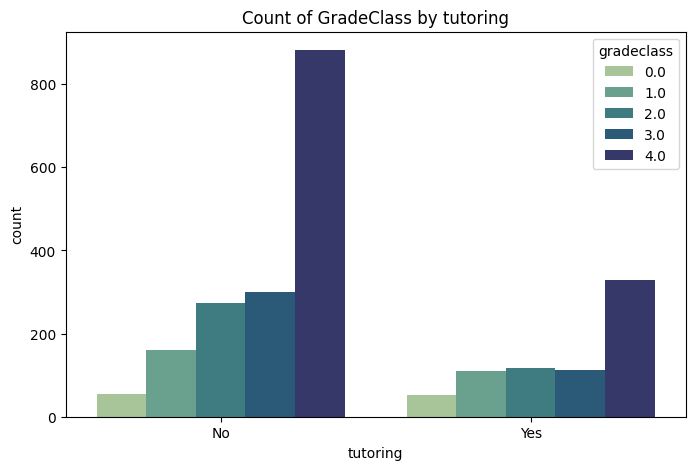

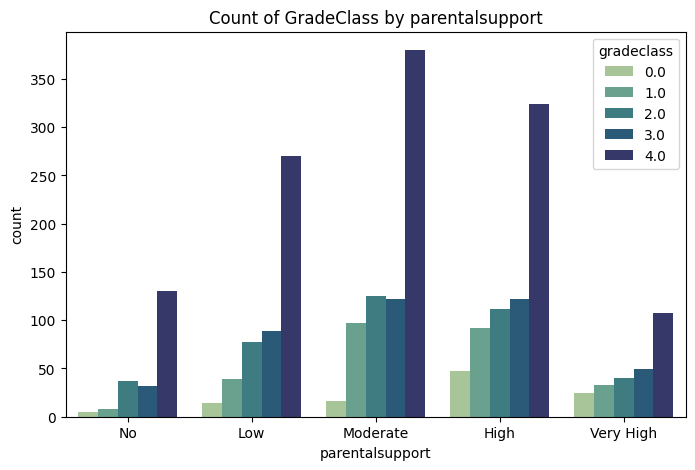

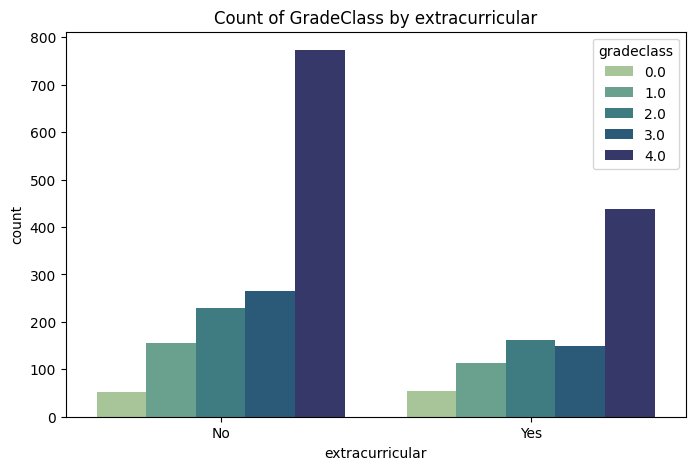

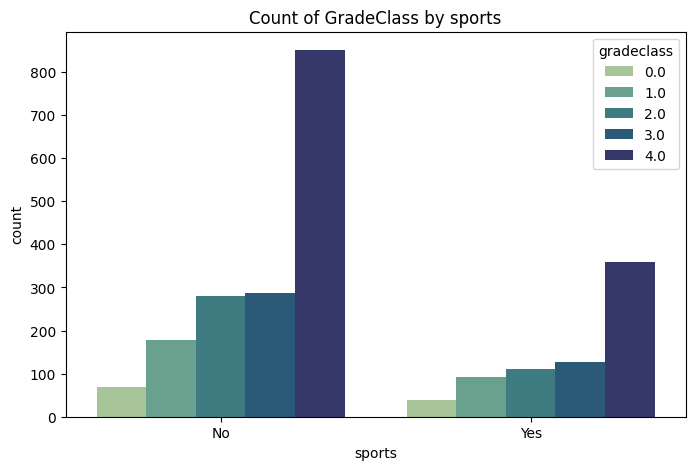

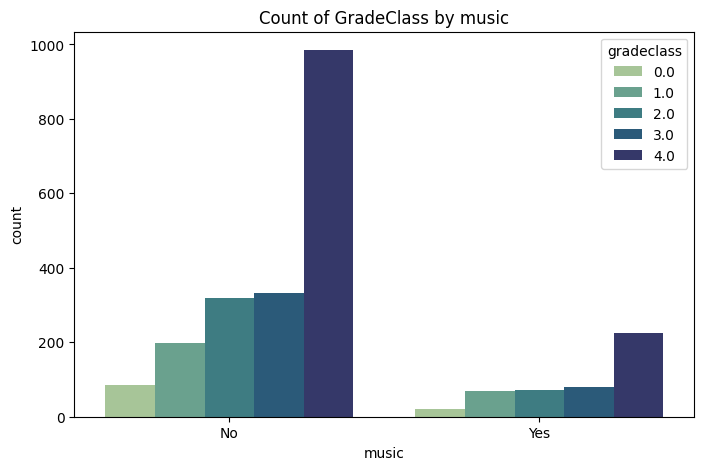

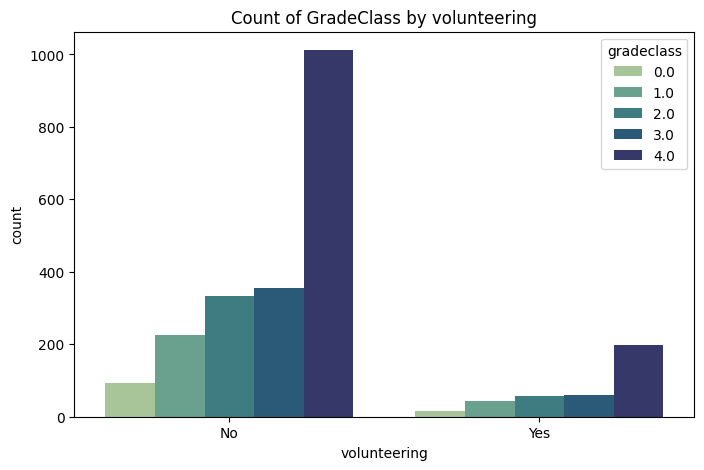

In [ ]:
for col in X_cat:
  plt.figure(figsize=(8,5))
  sns.countplot(data=df_cleaned, x=col, hue='gradeclass',palette='crest')
  plt.title(f'Count of GradeClass by {col}')

  labels = custom_labels[col]
  ticks = range(len(labels))
  plt.xticks(ticks, labels)

  plt.show()

Pattern of each categorical variable against `gradeclass` is the same

In [ ]:
for col in X_cat:
  print(f'Stat Test: {col} dan GradeClass')
  contingency_table = pd.crosstab(df_cleaned[col], df_cleaned['gradeclass'])
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)
  print(f"P-value: {p_value:.4f}\n")

Stat Test: gender dan GradeClass
P-value: 0.7513

Stat Test: ethnicity dan GradeClass
P-value: 0.7914

Stat Test: parentaleducation dan GradeClass
P-value: 0.5333

Stat Test: tutoring dan GradeClass
P-value: 0.0000

Stat Test: parentalsupport dan GradeClass
P-value: 0.0000

Stat Test: extracurricular dan GradeClass
P-value: 0.0066

Stat Test: sports dan GradeClass
P-value: 0.3583

Stat Test: music dan GradeClass
P-value: 0.0956

Stat Test: volunteering dan GradeClass
P-value: 0.8297



$\therefore$ `tutoring`, `parentalsupport`, dan `extracurricular` have a significant effect on GPA or class grades. `Music` also has a considerable effect if $\alpha = 0.1$

Based on their influence, it is likely that `parental support`, `extracurricular activities`, and `music` can maintain students' mental health, enabling them to think clearly and complete their studies. In addition, with `tutoring`, they can be more active in asking questions that they did not have time to ask during class.

/tmp/ipython-input-3306127479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='gradeclass', y=col, palette='crest')


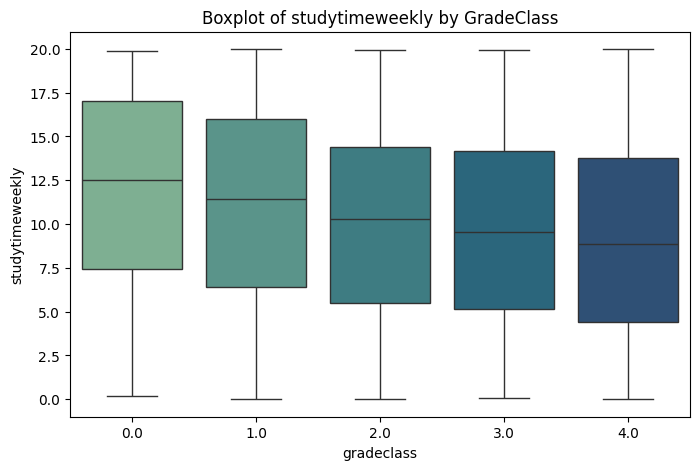

/tmp/ipython-input-3306127479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='gradeclass', y=col, palette='crest')


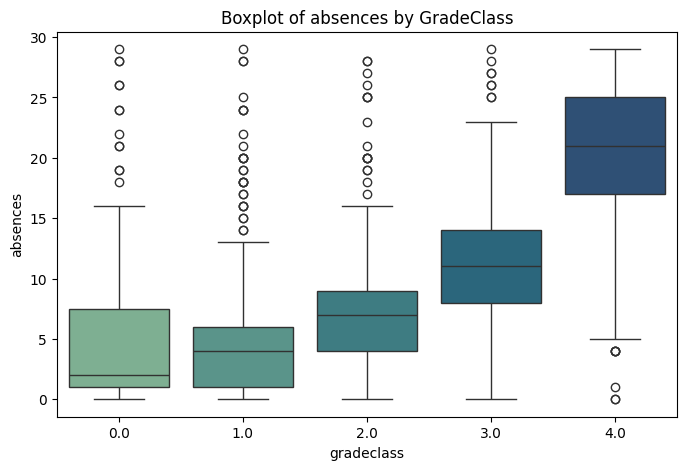

/tmp/ipython-input-3306127479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='gradeclass', y=col, palette='crest')


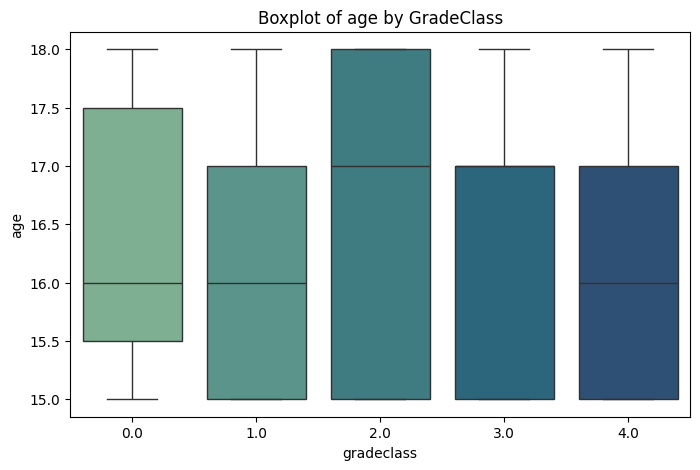

In [ ]:
for col in ['studytimeweekly','absences','age']:
  plt.figure(figsize=(8,5))
  sns.boxplot(data=df_cleaned, x='gradeclass', y=col, palette='crest')
  plt.title(f'Boxplot of {col} by GradeClass')
  plt.show()

- The more students are absent, the higher the chance that their GPA will be low.
- The more students study weekly, the higher their grades will be.

In [ ]:
def run_kruskal(df, num_col, cat_col):
    """
    Uji Kruskal-Wallis antara variabel numerik dan kategori ordinal.
    """
    groups = [group[num_col].values for _, group in df.groupby(cat_col)]
    stat, p = kruskal(*groups)
    print(f"Kruskal-Wallis {num_col} vs {cat_col}")
    print(f"H-statistic = {stat:.4f}, p-value = {p:.4f}")

In [ ]:
for col in ['studytimeweekly','absences','age']:
  run_kruskal(df_cleaned, col, 'gradeclass')
  print('')

Kruskal-Wallis studytimeweekly vs gradeclass
H-statistic = 44.2563, p-value = 0.0000

Kruskal-Wallis absences vs gradeclass
H-statistic = 1436.3230, p-value = 0.0000

Kruskal-Wallis age vs gradeclass
H-statistic = 0.6536, p-value = 0.9569



`studytimeweekly` and `absences` also significantly affect gradeclass

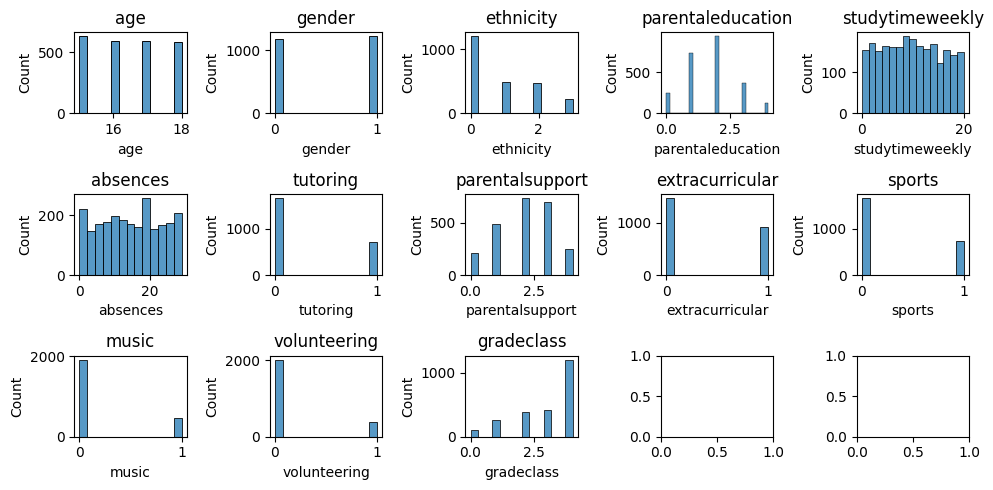

In [ ]:
fig, axes = plt.subplots(3,5)
fig.set_size_inches(10,5)

for col, ax in zip(df_cleaned.columns, axes.flatten()):
    sns.histplot(df_cleaned[col], ax=ax)
    ax.set_title(col)
    plt.tight_layout()

plt.show()

Interpretation:
- `parentaleducation` and `parentalsupport` are close to normal distribution
- `age`, `studytimeweekly`, and `absences` are close to uniform distribution

MinMaxScaler for `age`, `studytimeweekly`, and `absences` in feature scaling should be sufficient.

# Preprocessing

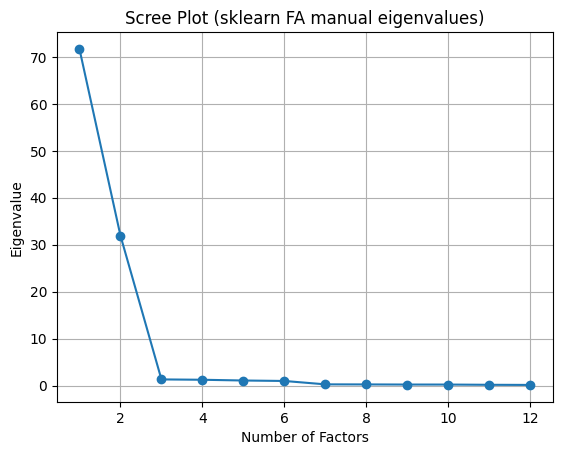

In [ ]:
cov_matrix = np.cov(feature.T)   # X = data numerik
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Scree plot
plt.plot(range(1, len(eigenvalues)+1), sorted(eigenvalues, reverse=True), marker="o")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot (sklearn FA manual eigenvalues)")
plt.grid()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import FactorAnalysis

In [ ]:
num_features = ["age","studytimeweekly", "absences"]
ord_features = ["parentaleducation", "parentalsupport", "ethnicity"]
bin_features = ["gender", "tutoring", "extracurricular", "sports", "music", "volunteering"]

In [ ]:
num_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())])

ord_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())])

bin_transformer = "passthrough"

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("ord", ord_transformer, ord_features),
        ("bin", bin_transformer, bin_features)
    ]
)

In [ ]:
fa_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("fa", FactorAnalysis(n_components=4, rotation="varimax"))
])

In [ ]:
fa_pipeline.fit(feature)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'studytimeweekly',
                                                   'absences']),
                                                 ('ord',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['parentaleducation',
                                                   'parentalsupport',
                                                   'ethnicity']),
                                                 ('bin', 'passthrough',
                                                  ['gender', 'tutoring',
                                                   'extracurricular', 'sports',
                                                   'music',
                                                   'volunteering'])])),
                ('fa', FactorAnalysis(n_components=4, rotation='varimax'))])

                    Factor1   Factor2   Factor3   Factor4
age               -0.179284  0.001378  0.010483  0.034514
gender             0.012497 -0.011320 -0.022747  0.053210
ethnicity          0.006768 -0.125888  0.028605 -0.001090
parentaleducation -0.030240 -0.047187  0.129536  0.003492
studytimeweekly   -0.020120  0.001880  0.002014  0.216395
absences           0.068889  0.069239  0.085084  0.064100
tutoring          -0.035729 -0.016496  0.043266  0.033909
parentalsupport    0.008131 -0.010482 -0.114597  0.009147
extracurricular    0.012592 -0.000173 -0.006652 -0.040917
sports             0.040680 -0.043415 -0.006088 -0.011105
music              0.006025  0.012143  0.030979  0.039735
volunteering      -0.005816  0.028619  0.059323 -0.006904


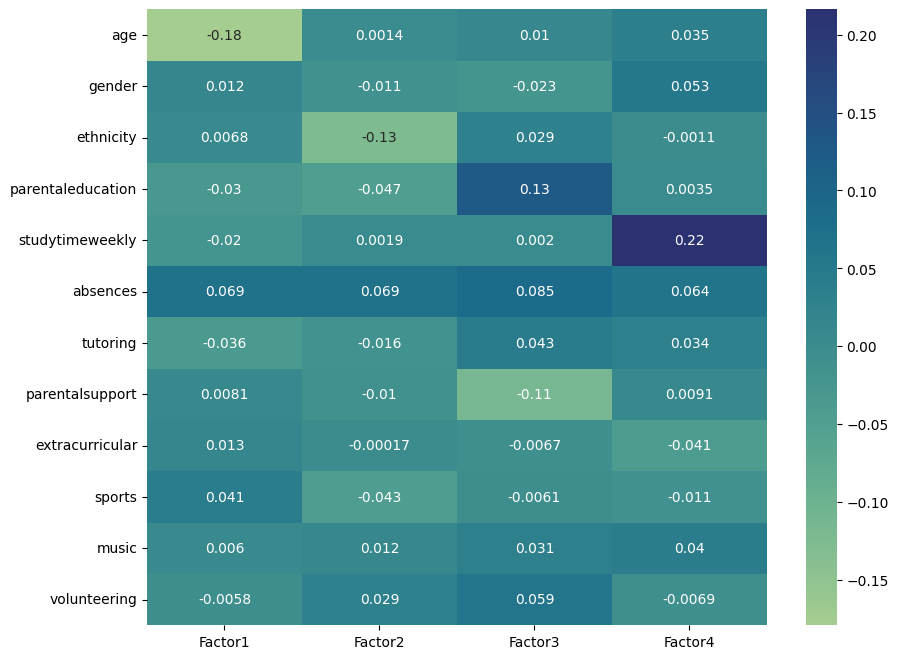

In [ ]:
fa_model = fa_pipeline.named_steps["fa"]
loadings = pd.DataFrame(
    fa_model.components_.T,
    index=feature.columns,
    columns=[f"Factor{i+1}" for i in range(fa_model.n_components)]
)
print(loadings)

plt.figure(figsize=(10,8))
sns.heatmap(loadings, annot=True, cmap="crest")
plt.show()

- When using the 3-component factor, there is still a cluster pattern in the 3 factors, so the 4-component factor is used.
- Tutoring, parental support, and extracurricular activities have significant loadings in several factors.
- Music also contributes to one factor, but less than the three features above.
- These factors represent a combination of correlated variables that influence GradeClass/GPA.

$\therefore$ These factors indicate that parental support, extracurricular activities, and tutoring are important elements that influence academic performance.

# Modeling (Classification) -> Tanpa Hyperparameter

In [ ]:
factor_scores = fa_model.transform(feature)
factor_scores = pd.DataFrame(
    factor_scores,
    columns=[f"Factor{i+1}" for i in range(fa_model.n_components)]
)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FactorAnalysis was fitted without feature names
  warnings.warn(


In [ ]:
df_class = pd.concat([factor_scores, df["gradeclass"]], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    factor_scores, df_class["gradeclass"], test_size=0.2, random_state=42
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()}

In [ ]:
model_names = []
roc_auc_train = []
roc_auc_test = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # Prediksi probabilitas
    y_proba_train = model.predict_proba(X_train)
    y_proba_test = model.predict_proba(X_test)

    # Simpan hasil
    model_names.append(name)
    roc_auc_train.append(roc_auc_score(y_train, y_proba_train, multi_class='ovr'))
    roc_auc_test.append(roc_auc_score(y_test, y_proba_test, multi_class='ovr'))

    print(f"{name} -> Train ROC AUC: {roc_auc_train[-1]:.3f}, Test ROC AUC: {roc_auc_test[-1]:.3f}")


Decision Tree -> Train ROC AUC: 1.000, Test ROC AUC: 0.650
Random Forest -> Train ROC AUC: 1.000, Test ROC AUC: 0.841
Gradient Boosting -> Train ROC AUC: 0.970, Test ROC AUC: 0.839
AdaBoost -> Train ROC AUC: 0.824, Test ROC AUC: 0.815
K-Nearest Neighbors -> Train ROC AUC: 0.926, Test ROC AUC: 0.786
XGBoost -> Train ROC AUC: 1.000, Test ROC AUC: 0.817
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1913, number of used features: 4
[LightGBM] [Info] Start training from score -3.113777
[LightGBM] [Info] Start training from score -2.162800
[LightGBM] [Info] Start training from score -1.832843
[LightGBM] [Info] Start training from score -1.763414
[LightGBM] [Info] Start training from score -0.675017
LightGBM -> Train ROC AUC: 1.000, Test ROC AUC: 0.825


/tmp/ipython-input-4256040681.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Train ROC/AUC', y='Model', data=df_train, palette='crest')


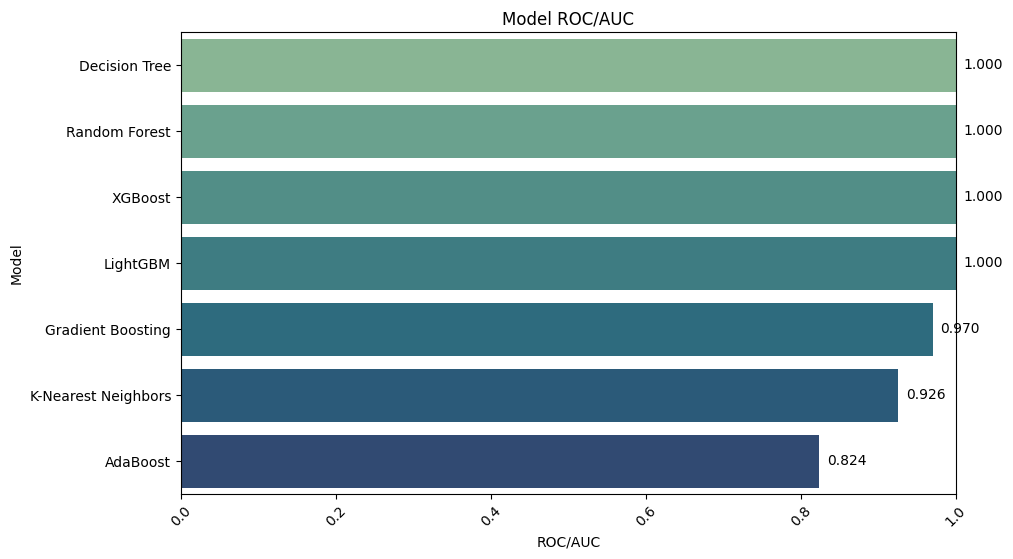

In [ ]:
df_train = pd.DataFrame({'Model': model_names, 'Train ROC/AUC': roc_auc_train}).sort_values(by='Train ROC/AUC', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Train ROC/AUC', y='Model', data=df_train, palette='crest')

for i, v in enumerate(df_train['Train ROC/AUC']):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')

plt.title('Model ROC/AUC')
plt.xlabel('ROC/AUC')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1289562551.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Test ROC/AUC', y='Model', data=df_test, palette='crest')


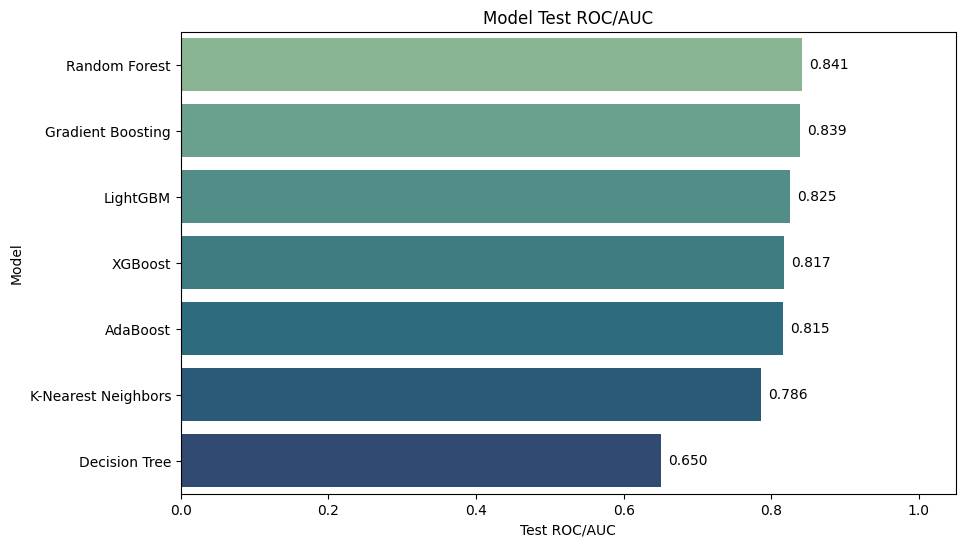

In [ ]:
df_test = pd.DataFrame({
    'Model': model_names,
    'Test ROC/AUC': roc_auc_test
}).sort_values(by='Test ROC/AUC', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Test ROC/AUC', y='Model', data=df_test, palette='crest')

# Tambahin angka di ujung bar (pakai df_test, bukan df_train)
for i, v in enumerate(df_test['Test ROC/AUC']):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')

plt.title('Model Test ROC/AUC')
plt.xlabel('Test ROC/AUC')
plt.ylabel('Model')
plt.xlim(0, 1.05)
plt.show()

Interpretation:
- Gradient Boosting is the best model
- KNN and Adaboost are still overfitting
- The rest are severely overfitting

# Modelling + Hyperparameter (Khusus Gradient Boosting, KNN, dan Adaboost)

In [ ]:
!pip install optuna
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 10.9 MB/s eta 0:00:00


## Gradient Boosting

In [ ]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 2, 5),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10)
    }

    model = GradientBoostingClassifier(**params, random_state=42)

    # cross-validation 5-fold
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc_ovr')
    return score.mean()

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # bisa diubah jumlah trial

print("Best params:", study.best_params)
print("Best score:", study.best_value)

[I 2025-09-16 13:06:14,641] A new study created in memory with name: no-name-e980b029-455e-428e-9888-a47812c79103
[I 2025-09-16 13:06:36,258] Trial 0 finished with value: 0.8190872129068222 and parameters: {'n_estimators': 138, 'max_depth': 4, 'learning_rate': 0.042142888314687606, 'subsample': 0.9071683585131471, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8190872129068222.
[I 2025-09-16 13:06:57,164] Trial 1 finished with value: 0.8297609316210846 and parameters: {'n_estimators': 244, 'max_depth': 4, 'learning_rate': 0.016230106140412308, 'subsample': 0.7728182563899119, 'min_samples_split': 5, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8297609316210846.
[I 2025-09-16 13:07:03,823] Trial 2 finished with value: 0.8116100850976674 and parameters: {'n_estimators': 101, 'max_depth': 3, 'learning_rate': 0.18773797798918404, 'subsample': 0.9018420596138902, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.82976093162

Best params: {'n_estimators': 81, 'max_depth': 5, 'learning_rate': 0.02099280959534346, 'subsample': 0.6634397247623155, 'min_samples_split': 5, 'min_samples_leaf': 10}
Best score: 0.8361320773334159


In [ ]:
best_params = study.best_params
print("Best Hyperparameters for Decision Tree:", best_params)

gbc = GradientBoostingClassifier(**best_params, random_state=42)
gbc.fit(X_train, y_train)

y_proba_train_gbc = gbc.predict_proba(X_train)
y_proba_test_gbc = gbc.predict_proba(X_test)

roc_auc_train_gbc = roc_auc_score(y_train, y_proba_train_gbc, multi_class='ovr')
roc_auc_test_gbc = roc_auc_score(y_test, y_proba_test_gbc, multi_class='ovr')

print(f"Train ROC AUC: {roc_auc_train_gbc:.3f}")
print(f"Test ROC AUC: {roc_auc_test_gbc:.3f}")

Best Hyperparameters for Decision Tree: {'n_estimators': 81, 'max_depth': 5, 'learning_rate': 0.02099280959534346, 'subsample': 0.6634397247623155, 'min_samples_split': 5, 'min_samples_leaf': 10}
Train ROC AUC: 0.933
Test ROC AUC: 0.848


## K-Nearest Neighbors

In [ ]:
def objective(trial):
    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 3, 30),
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        "p": trial.suggest_int("p", 1, 2)
    }

    model = KNeighborsClassifier(**params)

    # cross-validation 3-fold, multi-class aware
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc_ovr').mean()

    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # bisa diubah jumlah trial

print("Best params:", study.best_params)
print("Best score:", study.best_value)

[I 2025-09-16 13:14:04,175] A new study created in memory with name: no-name-311e7e91-81c4-46aa-85d6-2ad46d6ce254
[I 2025-09-16 13:14:04,236] Trial 0 finished with value: 0.7980806773569517 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.7980806773569517.
[I 2025-09-16 13:14:04,295] Trial 1 finished with value: 0.7941251325341036 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.7980806773569517.
[I 2025-09-16 13:14:04,350] Trial 2 finished with value: 0.7835438067854535 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.7980806773569517.
[I 2025-09-16 13:14:04,407] Trial 3 finished with value: 0.7679781942361306 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7980806773569517.
[I 2025-09-16 13:14:04,472] Trial 4 finished with value: 0.8061149004443099 and parameters: {'n_neighbors': 27, 'weigh

Best params: {'n_neighbors': 29, 'weights': 'distance', 'p': 1}
Best score: 0.8079328597435875


In [ ]:
best_params = study.best_params
print("Best Hyperparameters for Decision Tree:", best_params)

knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)

y_proba_train_knn = knn.predict_proba(X_train)
y_proba_test_knn = knn.predict_proba(X_test)

roc_auc_train_knn = roc_auc_score(y_train, y_proba_train_knn, multi_class='ovr')
roc_auc_test_knn = roc_auc_score(y_test, y_proba_test_knn, multi_class='ovr')

print(f"Train ROC AUC: {roc_auc_train_knn:.3f}")
print(f"Test ROC AUC: {roc_auc_test_knn:.3f}")

Best Hyperparameters for Decision Tree: {'n_neighbors': 29, 'weights': 'distance', 'p': 1}
Train ROC AUC: 1.000
Test ROC AUC: 0.816


## Adaboost

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0)

    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm='SAMME',  # ganti di sini
        random_state=42
    )

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc_ovr').mean()

    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # bisa diubah jumlah trial

print("Best params:", study.best_params)
print("Best score:", study.best_value)

[I 2025-09-16 13:14:07,586] A new study created in memory with name: no-name-3edebe78-2579-4de6-b2e9-53681058d456
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
[I 2025-09-16 13:14:09,451] Trial 0 finished with value: 0.7732990249267623 and parameters: {'n_estimators': 133, 'learning_rate': 0.05307631296498125}. Best is trial 0 with value: 0.7732990249267623.
/usr/local/lib/python3.12/dist-packages/

Best params: {'n_estimators': 113, 'learning_rate': 0.45669370158648603}
Best score: 0.7942133785717197


In [ ]:
best_params = study.best_params
print("Best Hyperparameters for Decision Tree:", best_params)

abc = AdaBoostClassifier(**best_params)
abc.fit(X_train, y_train)

y_proba_train_abc = abc.predict_proba(X_train)
y_proba_test_abc = abc.predict_proba(X_test)

roc_auc_train_abc = roc_auc_score(y_train, y_proba_train_abc, multi_class='ovr')
roc_auc_test_abc = roc_auc_score(y_test, y_proba_test_abc, multi_class='ovr')

print(f"Train ROC AUC: {roc_auc_train_abc:.3f}")
print(f"Test ROC AUC: {roc_auc_test_abc:.3f}")

Best Hyperparameters for Decision Tree: {'n_estimators': 113, 'learning_rate': 0.45669370158648603}
Train ROC AUC: 0.829
Test ROC AUC: 0.824


# Kesimpulan

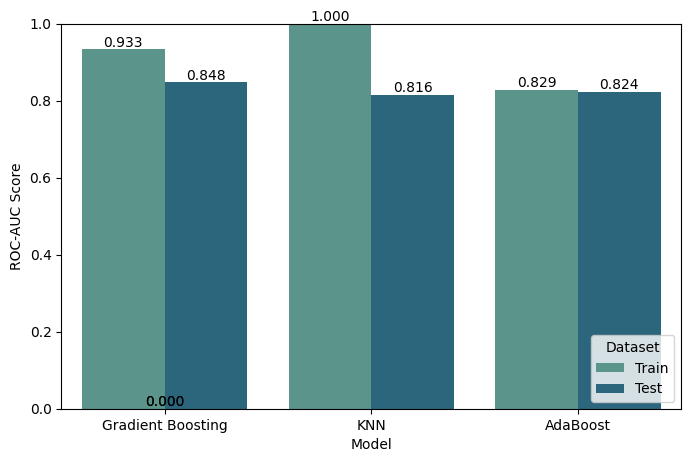

In [ ]:
models = ['Gradient Boosting', 'KNN', 'AdaBoost']
roc_train = [roc_auc_train_gbc, roc_auc_train_knn, roc_auc_train_abc]
roc_test  = [roc_auc_test_gbc, roc_auc_test_knn, roc_auc_test_abc]

df_roc = pd.DataFrame({
    'Model': models*2,
    'ROC_AUC': roc_train + roc_test,
    'Dataset': ['Train']*3 + ['Test']*3
})

plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_roc, x='Model', y='ROC_AUC', hue='Dataset', palette='crest')
plt.ylim(0,1)
plt.ylabel('ROC-AUC Score')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.show()

Interpretation:
- Gradient Boosting:
  - Train 0.939, Test 0.847 → good performance, slight overfitting
  - Gradient Boosting: most accurate, but there is a slight gap between train & test
- KNN:
  - Train 1.0, Test 0.816 → significant overfitting
  - Clearly overfitted, may not be suitable for multi-class GPA prediction
- AdaBoost:
  - Train 0.823, Test 0.826 → stable performance, good generalization
  - Quite stable, could be an option if you want a more generalized model

/tmp/ipython-input-1520333463.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=df_feat, palette='crest')


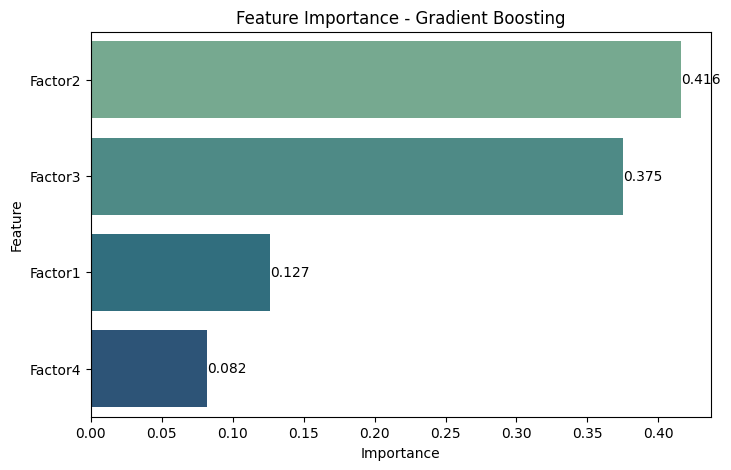

In [ ]:
feature_names = X_train.columns
importances = gbc.feature_importances_

df_feat = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x='Importance', y='Feature', data=df_feat, palette='crest')

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}',
                (width, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10)

plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.show()

Interpretation:
- Factor 4 is relatively small, contributing only slightly to the prediction of `gradeclass`.
- The most influential factors are factor 2 and factor 3. This is likely related to tutoring, parental support, and extracurricular activities in the previous FA heatmap, as shown in the image below.

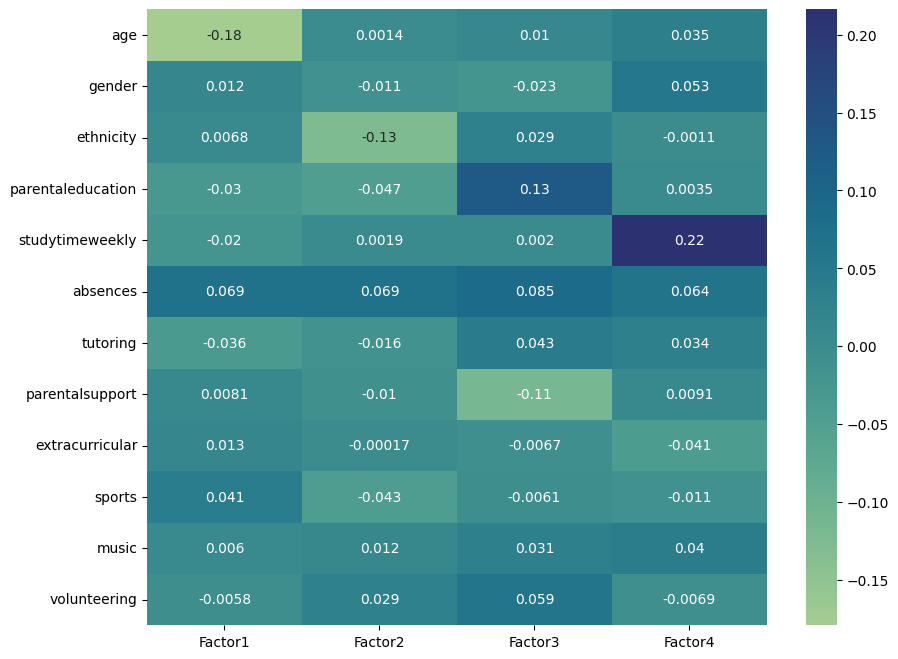

/tmp/ipython-input-3078631559.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=df_feat, palette='crest')


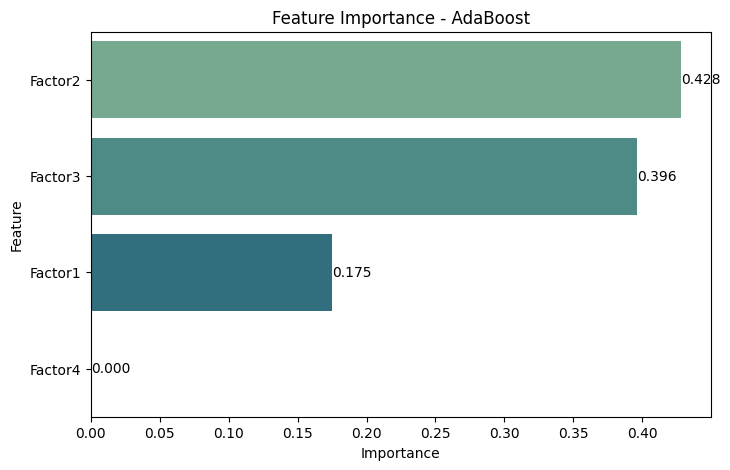

In [ ]:
feature_names = X_train.columns
importances = abc.feature_importances_

df_feat = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x='Importance', y='Feature', data=df_feat, palette='crest')

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.3f}',
                (width, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10)

plt.title('Feature Importance - AdaBoost')
plt.xlabel('Importance')
plt.show()

Overall Recommendations:
- For students:
  - Take advantage of tutoring if there is material that you do not understand.
  - Increase extracurricular and music activities to maintain mental balance and focus on learning.
  - Keep absences to a minimum so you don't miss any material.
  - Add weekly study time to reinforce your understanding of the material.
- For schools:
  - Utilize tutoring if there is material that is not understood.
  - Increase extracurricular and music activities to maintain mental balance and focus on learning.
  - Keep absences to a minimum so as not to miss material.
  - Add weekly study time to reinforce understanding of the material.
- For prediction models:
  - Want high accuracy → Gradient Boosting
  - Want a more stable model with better generalization → Ada Boost